In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [4]:
df = pd.read_csv("data_CAR.csv")   # change dataset name

In [5]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,36.09,36.2200,34.83,35.40,978660,2019-04-15,35.0413,2019-04-15,56.9490,2019-04-15,53.5192
1,1,2019-04-12,35.87,37.2499,35.79,36.11,1390415,2019-04-12,34.9861,2019-04-12,63.2554,2019-04-12,59.7613
2,2,2019-04-11,34.80,35.6956,34.80,35.61,1206714,2019-04-11,34.8132,2019-04-11,60.3868,2019-04-11,50.7221
3,3,2019-04-10,34.45,35.0900,33.90,34.78,856181,2019-04-10,34.6906,2019-04-10,54.9679,2019-04-10,41.2469
4,4,2019-04-09,34.23,34.3885,33.47,34.32,1100790,2019-04-09,34.6769,2019-04-09,51.5575,2019-04-09,43.1851


In [6]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    35.40
1    36.11
2    35.61
3    34.78
4    34.32
Name: close, dtype: float64

In [7]:
len(close)

5341

In [8]:
train = close.loc[:len(close) -  int(len(close)*0.15)  -1]
test = close.loc[len(close) -  int(len(close)*0.15) :]
print(train.tail())
print(test.head())

4535    13.89
4536    14.42
4537    14.59
4538    14.50
4539    14.25
Name: close, dtype: float64
4540    14.30
4541    13.95
4542    13.53
4543    13.16
4544    13.57
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

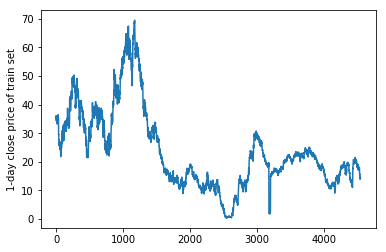

In [9]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

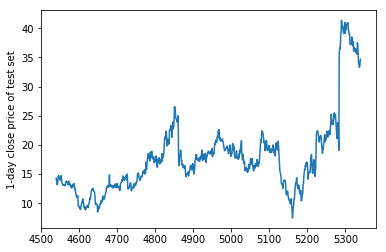

In [10]:
test.plot()
plt.ylabel('1-day close price of test set')

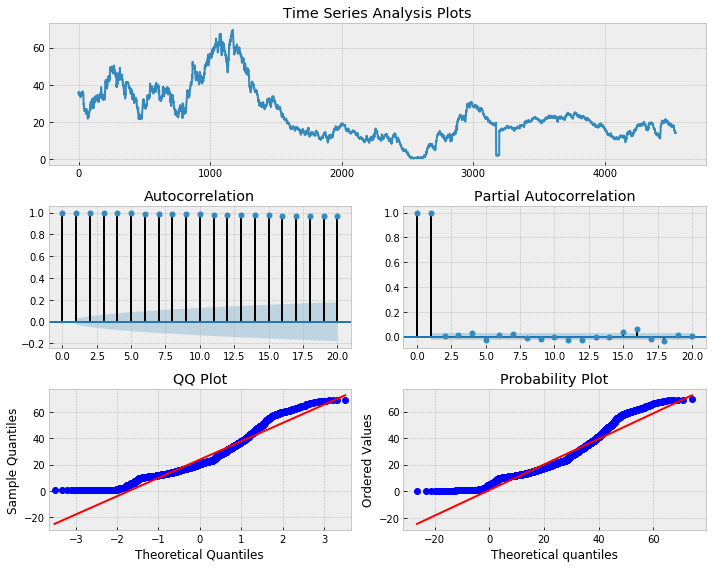

In [11]:
tsplot(train, lags=20)

In [12]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-1.9572422604661859,
 0.305629631082048,
 17,
 4522,
 {'1%': -3.431796929668033,
  '5%': -2.8621793715766164,
  '10%': -2.5671103408193976},
 10712.037199804976)

Text(0,0.5,'Difference in 1-day close price')

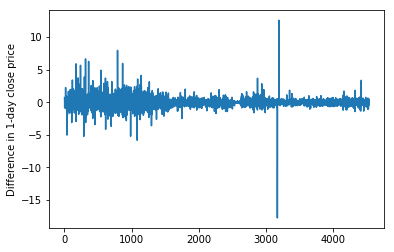

In [13]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [14]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-17.845865777045514,
 3.09315123771101e-30,
 14,
 4524,
 {'1%': -3.4317962896362406,
  '5%': -2.8621790888270993,
  '10%': -2.5671101902985627},
 10712.226797358378)

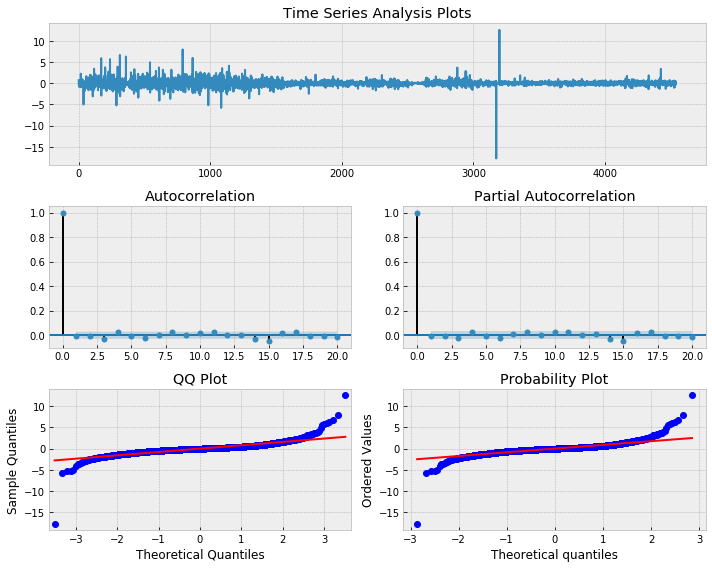

In [15]:
tsplot(train_diff, lags=20)

### Fit Model

In [16]:
arima010 = smt.ARIMA(train, (0,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima010_fit = arima010.fit() #change model name*2
arima010_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -5378.695
Method:                           css   S.D. of innovations              0.791
Date:                Wed, 17 Apr 2019   AIC                          10761.389
Time:                        17:19:11   BIC                          10774.230
Sample:                             1   HQIC                         10765.912
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.012     -0.397      0.692      -0.028       0.018
==============================================================================
"""

In [17]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5378.604
Method:                       css-mle   S.D. of innovations              0.791
Date:                Wed, 17 Apr 2019   AIC                          10763.207
Time:                        17:19:42   BIC                          10782.469
Sample:                             1   HQIC                         10769.991
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0047      0.012     -0.399      0.690      -0.028       0.018
ar.L1.D.close    -0.0063      0.015     -0.427      0.669      -0.035       0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -157.8001           +0.0000j          157.8001            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
arima011 = smt.ARIMA(train, (0,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima011_fit = arima011.fit() #change model name*2
arima011_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -5378.602
Method:                       css-mle   S.D. of innovations              0.791
Date:                Wed, 17 Apr 2019   AIC                          10763.204
Time:                        17:20:10   BIC                          10782.465
Sample:                             1   HQIC                         10769.988
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0047      0.012     -0.399      0.690      -0.028       0.018
ma.L1.D.close    -0.0065      0.015     -0.431      0.667      -0.036       0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          154.9505           +0.0000j          154.9505            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

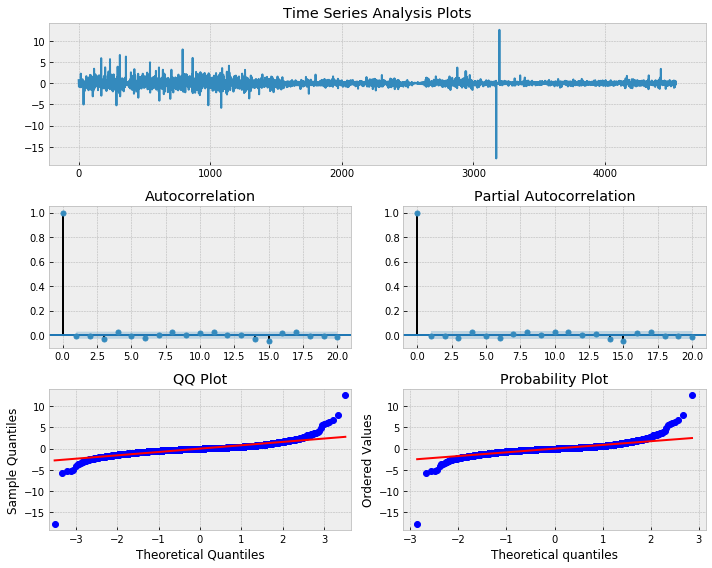

In [20]:
tsplot(arima010_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [21]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima010_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([6.9898684]), array([0.2213949]))

In [22]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima110_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([6.74729663]), array([0.24012269]))

In [23]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima011_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([6.74266138]), array([0.2404931]))

### Forecasting

In [25]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima110_fit.forecast(steps=num_steps)   #change model name

In [26]:
arima110_fit.forecast(steps=num_steps)   #change model name

(array([14.24689447, 14.24222434, 14.23756413, 14.23290385, 14.22824357]),
 array([0.79139103, 1.11565532, 1.36496293, 1.57529695, 1.76068089]),
 array([[12.69579656, 15.79799239],
        [12.0555801 , 16.42886858],
        [11.56228594, 16.91284231],
        [11.14537855, 17.32042914],
        [10.77737244, 17.6791147 ]]))

In [27]:
arima110_fit.forecast(steps=num_steps)[0][4]    #change model name

14.228243571692063

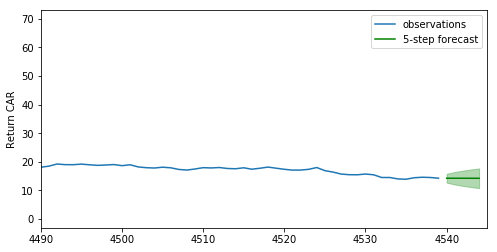

In [28]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return CAR')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [31]:
pred = []
for i in range( int(len(close)*0.15) ): 
    moving_train = close.loc[:len(close) -  int(len(close)*0.15)  -5 + i]
    moving_arima110 = smt.ARIMA(moving_train, (0,1,1))   #change model parameters  & model name
    moving_arima110_fit = moving_arima110.fit()   #change model name*2
    
    pred.append(moving_arima110_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


801

In [32]:
#(0,1,1)  
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9529787918174938
MAE = 1.1895817851998587
RMSE = 1.9554624924263766
Scaled MAE = 0.035121989524648914
Scaled RMSE = 0.057734351710256177


In [30]:
#(1,1,0)   final one
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9529795355673055
MAE = 1.1895777490921515
RMSE = 1.9554470272706739
Scaled MAE = 0.03512187035996905
Scaled RMSE = 0.05773389510689914
